In [1]:
import sympy as sp
from sympy import pi
from sympy import latex
from IPython.display import display, Math

d = sp.symbols("d")
d1, d2, d3, d4 = sp.symbols("d_1:5")

a = sp.symbols("a")
a1, a2, a3, a4 = sp.symbols("a_1:5")

l = sp.symbols("l")
l1, l2, l3, l4 = sp.symbols("l_1:5")

t1, t2, t3, t4, t5, t6 = sp.symbols("\\theta_1:7")

**定义旋转矩阵和平移矩阵**

In [2]:
def RotX(s, c):
    return sp.Matrix([[1, 0, 0, 0], [0, c, -s, 0], [0, s, c, 0], [0, 0, 0, 1]])

def Dx(a):
    return sp.Matrix([[1, 0, 0, a], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

def RotZ(s, c):
    return sp.Matrix([[c, -s, 0, 0], [s, c, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

def Dz(d):
    return sp.Matrix([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, d], [0, 0, 0, 1]])

def T(p, a, d, n):
    return sp.simplify(RotX(sp.sin(p), sp.cos(p)) * Dx(a) * Dz(d) * RotZ(sp.sin(n), sp.cos(n)))

**齐次变换矩阵的计算** 即 PPT 20 页的内容。

In [3]:
prev_alpha = sp.symbols("\\alpha_{i-1}")
prev_a = sp.symbols("a_{i-1}")
theta_i = sp.symbols("\\theta_i")
d_i = sp.symbols("d_i")
display(Math(f"^{{i-1}}T_i={latex(T(prev_alpha, prev_a, d_i, theta_i))}"))

<IPython.core.display.Math object>

In [4]:
def Kine(DH, params):
    # latex 形式显示 dh 参数表
    
    table_head = "\\begin{array}{c|c|c|c|c} \\hline i & \\alpha_{i-1} & a_{i-1} & d_i & \\theta_i \\\\"
    table = ""
    table_tail = "\\hline \\end{array}"
    
    def to_latex(var):
        if var == pi/2:
            return "90^\circ"
        elif var == -pi/2:
            return "-90^\circ"
        else:
            return var
    cnt = 0
    for xi, row in DH:
        cnt += 1
        table += f"{cnt} & {to_latex(row[0])} & {row[1]} & {row[2]} & {to_latex(row[3])} \\\\"
        
    display(Math(table_head + table + table_tail))
    
    Tn = sp.eye(4)
    J = sp.Matrix([])  # 创建一个空矩阵
    z_orn = []

    cnt = 0
    for xi, row in DH:
        Ti = T(row[0], row[1], row[2], row[3])
        Tn = Tn * Ti
        cnt += 1
        # if cnt != 1:
        #     display(Math(f"^{cnt-1}T_{cnt}={latex(Ti)}"))
        Tn = sp.simplify(Tn)
        display(Math(f"^{0}T_{cnt}={latex(Tn)}"))
        z_orn.append((Tn[0, 3], Tn[1, 3], Tn[2, 3]))
        if xi != -1:
            sub_matrix = Tn[0:3, 2] * xi
            J = J.row_join(sub_matrix)
    
    p = Tn[0:3, 3]
    display(Math(f"p={latex(p)}"))
    partial_matrix = p.jacobian(params)
    J = partial_matrix.col_join(J)
    J = sp.simplify(J)
    display(Math(f"J={latex(J)}"))

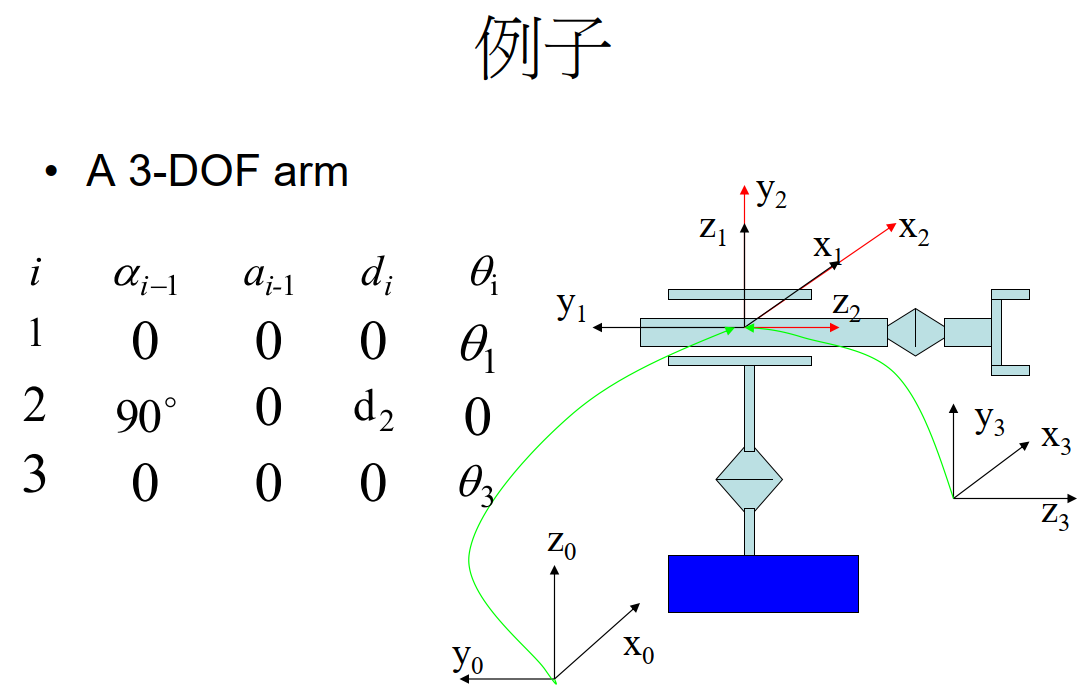

In [5]:
DH = [
    (1, [0, 0, 0, t1]),
    (0, [pi/2, 0, d2, 0]),
    (1, [0, 0, 0, t3]),
]
"""
pair 的第一个参数说明
1 代表旋转关节
0 代表平移关节
-1 代表固定关节
"""
param = [t1, d2, t3]
Kine(DH, param)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

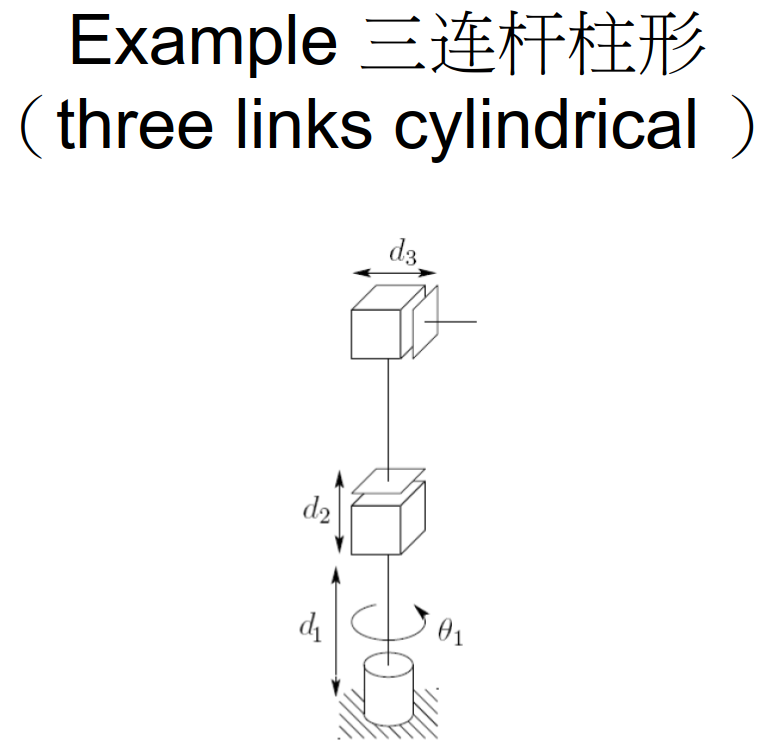

In [6]:
DH = [
    (1, [0, 0, d1, t1]),
    (0, [0, 0, d2, 0]),
    (0, [-pi/2, 0, d3, 0]),
]
param = [t1, d2, d3]
Kine(DH, param)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

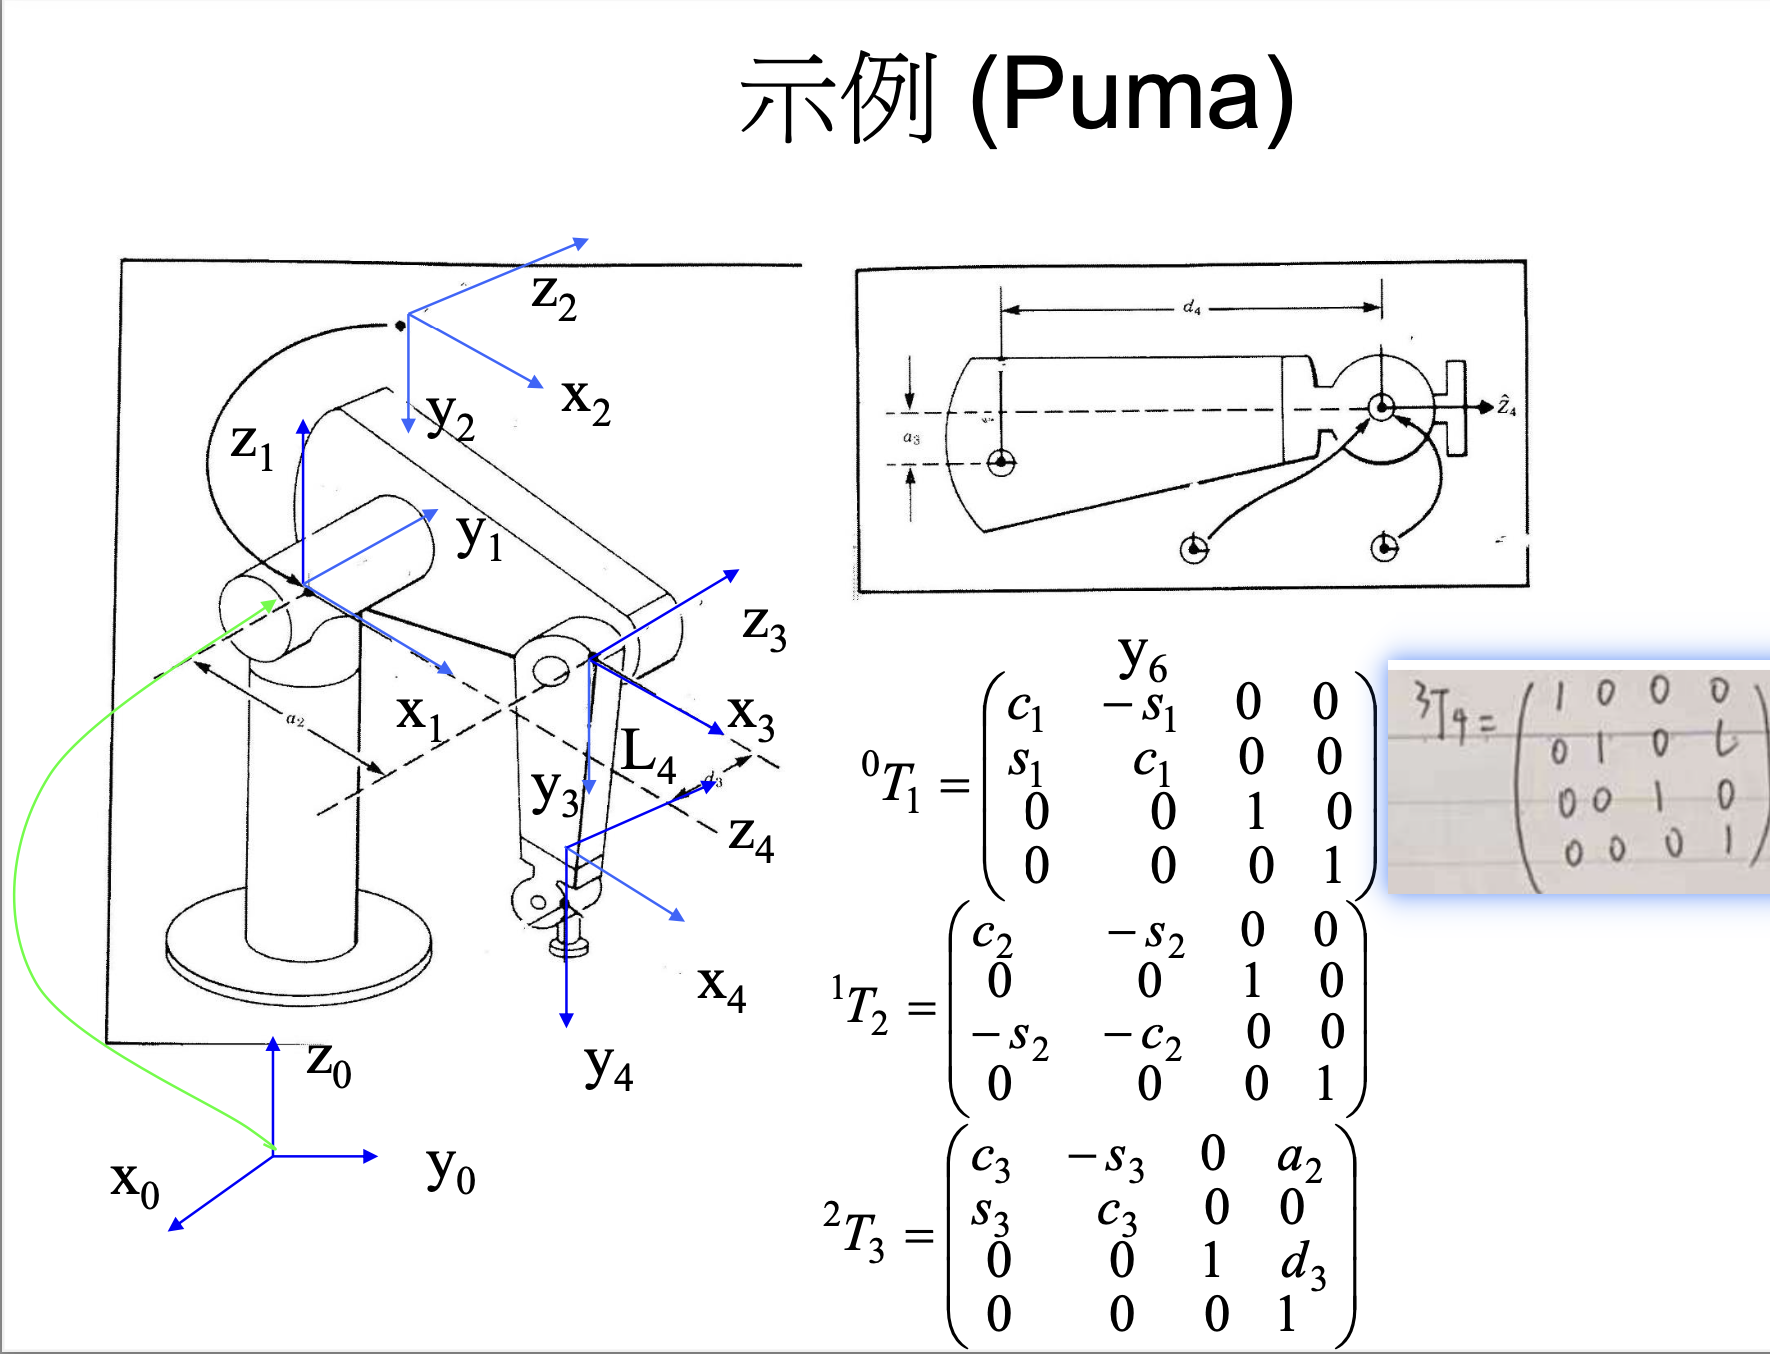

In [7]:
DH = [
    (1, [0, 0, 0, t1]),
    (1, [-pi/2, 0, 0, t2]),
    (1, [0, a2, d3, t3]),
    (-1, [0, l, 0, 0])
]
param = [t1, t2, t3]
Kine(DH, param)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

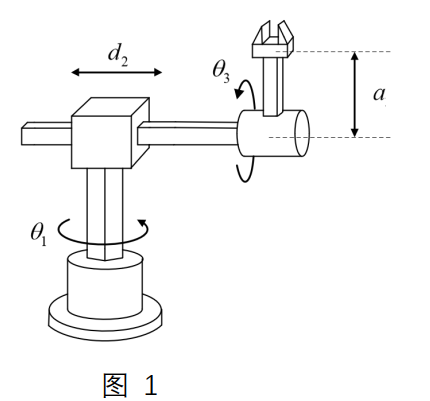

In [8]:
# 补充习题第一题他那个DH参数表有点问题
# 算的结果不是拿他那个表算的
DH = [
    (1, [0, 0, 0, t1]),
    (0, [-pi/2, 0, d2, 0]),
    (1, [0, 0, 0, t3]),
    (-1, [-pi/2, 0, a, 0])
]
param = [t1, d2, t3]
Kine(DH, param)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

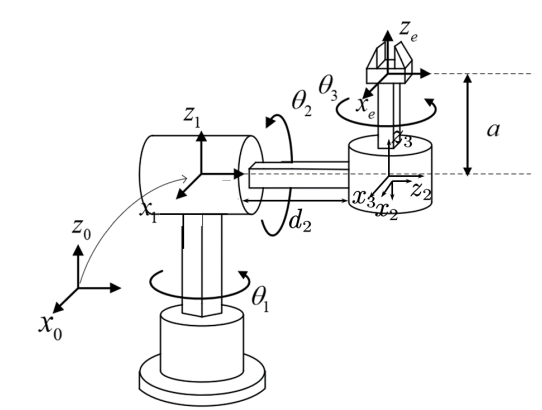

In [9]:
DH = [
    (1, [0, 0, 0, t1]),
    (1, [-pi/2, 0, d2, t2]),
    (1, [pi/2, 0, 0, 0]),
    (-1, [0, 0, a, t3])
]
param = [t1, t2, t3]
Kine(DH, param)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

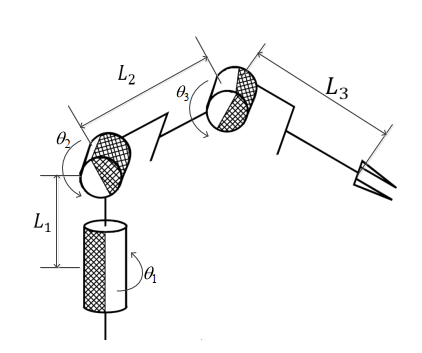

In [10]:
DH = [
    (1, [0, 0, l1, t1]),
    (1, [pi/2, 0, 0, t2]),
    (1, [0, l2, 0, t3]),
    (-1, [0, l3, 0, 0])
]
param = [t1, t2, t3]
Kine(DH, param)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

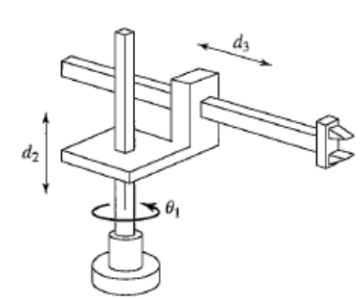

In [11]:
# 补充习题第四题
DH = [
    (1, [0, 0, 0, t1]),
    (0, [0, 0, d2, -pi/2]),
    (0, [-pi/2, -l1, d3, 0]),
]
param = [t1, d2, d3]
Kine(DH, param)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

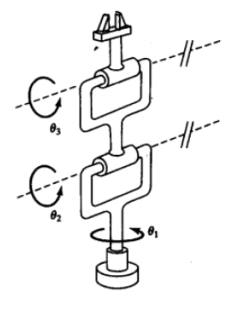

In [12]:
# 补充习题第五题
DH = [
    (1, [0, 0, l1, t1]),
    (1, [pi/2, 0, 0, t2]),
    (1, [0, l2, 0, t3]),
    (-1, [-pi/2, l3, 0, 0])
]
param = [t1, t2, t3]
Kine(DH, param)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

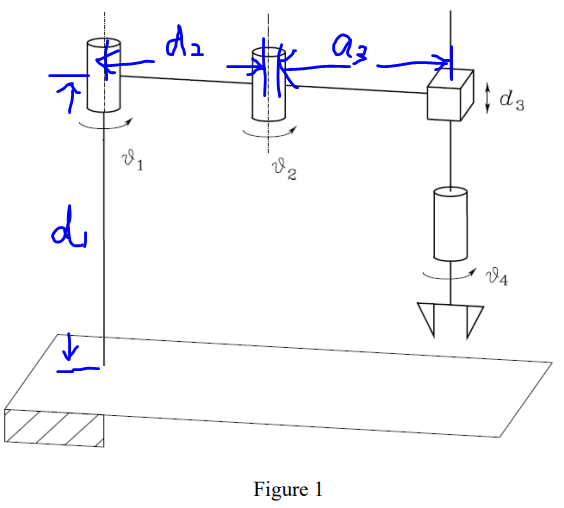

In [13]:
DH = [
    (1, [0, 0, 0, t1]),
    (1, [0, l1, 0, t2]),
    (0, [0, l2, d3, 0]),
    (1, [0, 0, l3, t4])
]
param = [t1, t2, d3, t4]
Kine(DH, param)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

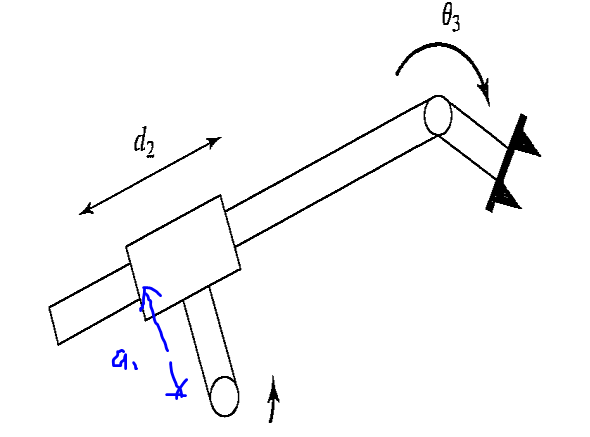

In [14]:
DH = [
    (1, [0, 0, 0, t1]),
    (0, [pi/2, a1, d2, 0]),
    (1, [-pi/2, 0, 0, t3]),
]
param = [t1, d2, t3]
Kine(DH, param)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

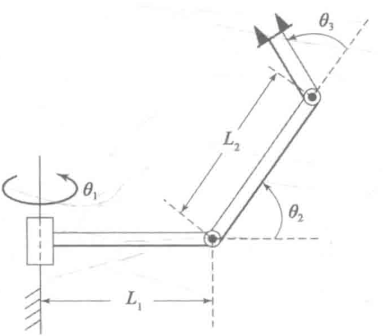

In [15]:
DH = [
    (1, [0, 0, 0, t1]),
    (1, [pi/2, l1, 0, t2]),
    (1, [0, l2, 0, t3]),
]
param = [t1, t2, t3]
Kine(DH, param)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

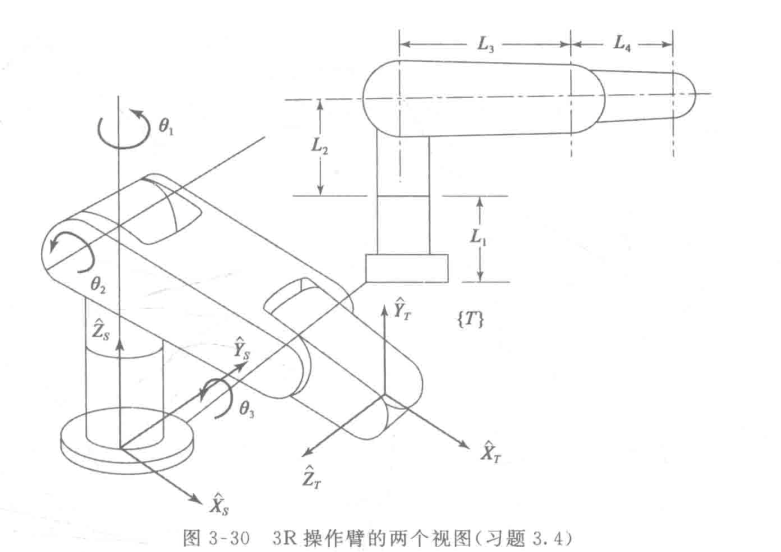

In [16]:
DH = [
    (1, [0, 0, l1+l2, t1]),
    (1, [pi/2, 0, 0, t2]),
    (1, [0, l3, 0, t3]),
    (-1, [0, l4, 0, 0])
]
param = [t1, t2, t3]
Kine(DH, param)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

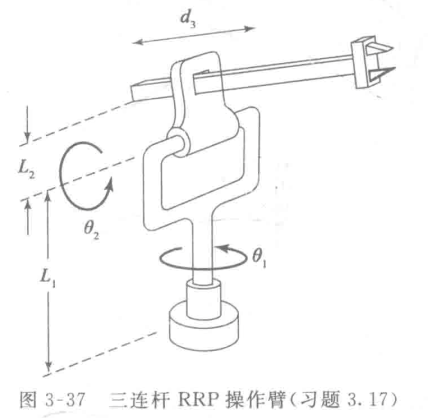

In [17]:
DH = [
    (1, [0, 0, l1, t1]),
    (1, [-pi/2, 0, 0, t2]),
    (-1, [0, l2, 0, 0]),
    (0, [pi/2, 0, d3, 0])
]
param = [t1, t2, d3]
Kine(DH, param)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

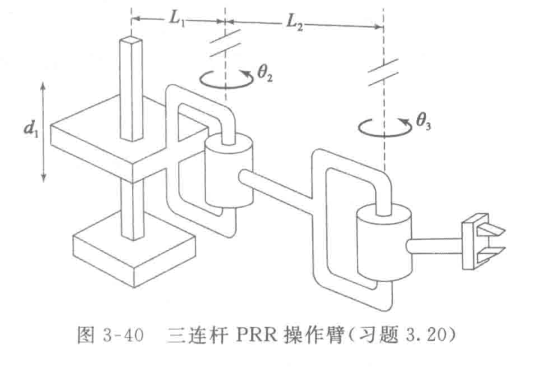

In [18]:
DH = [
    (0, [0, 0, d1, 0]),
    (1, [0, l1, 0, t2]),
    (1, [0, l2, 0, t3]),
    (-1, [0, l3, 0, 0])
]
param = [d1, t2, t3]
Kine(DH, param)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

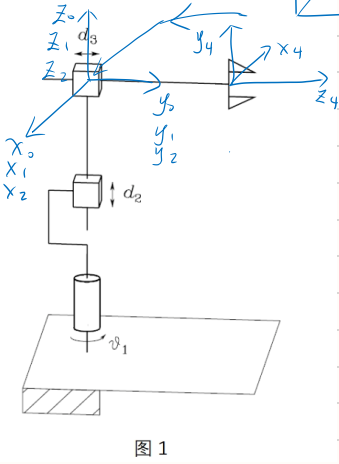

In [19]:
DH = [
    (1, [0, 0, 0, t1]),
    (0, [0, 0, d2, 0]),
    (0, [-pi/2, 0, d3, 0])
    # (-1, [0, 0, l, 0])
]
param = [t1, d2, d3]
Kine(DH, param)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [20]:
# 考试题
DH = [
    (0, [0, a1, d1, 0]),
    (1, [-pi/2, 0, d2, t2]),
    (-1, [0, 0, 0, -pi/2]),
    (1, [-pi/2, 0, d3, t3])
]
param = [d1, t2, t3]
Kine(DH, param)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>